# **Data Exploration**

In [0]:
import pandas as pd
data = pd.read_csv('Mall_Customers.csv')

link : https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python/download

***View of the data***

In [12]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [13]:
data.isnull().sum().sort_values(ascending=False)

Spending Score (1-100)    0
Annual Income (k$)        0
Age                       0
Gender                    0
CustomerID                0
dtype: int64

Number of Customers

In [14]:
len(data)

200

***Gender distribution***

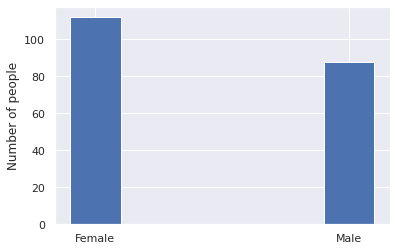

In [15]:
import matplotlib.pyplot as plt

f= len(data[data['Gender']=='Female'])
m= len(data[data['Gender']=='Male'])

y= [f,m]
x= ['Female','Male']

plt.xlabel('')
plt.ylabel('Number of people')
plt.bar(x,y,width=0.20)
plt.show()


***Quantitative data analysis***

In [16]:
data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


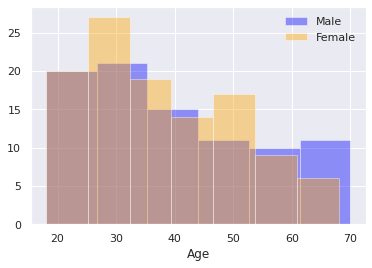

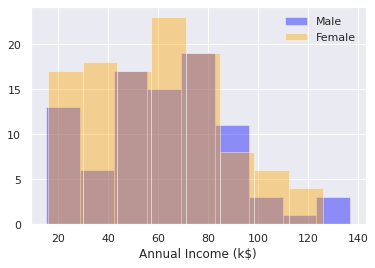

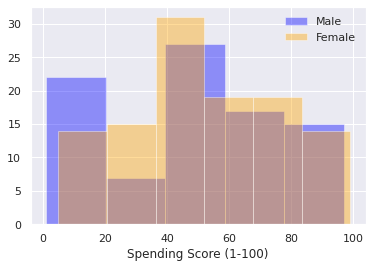

In [17]:
import seaborn as sns
sns.set(style="darkgrid")

for i in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)'] :
  sns.distplot(data[data['Gender'] == 'Male'][i], kde = False, color= 'blue', label = 'Male')
  sns.distplot(data[data['Gender'] == 'Female'][i], kde = False, color= 'orange', label = 'Female')
  plt.legend(framealpha = 0)
  plt.show()

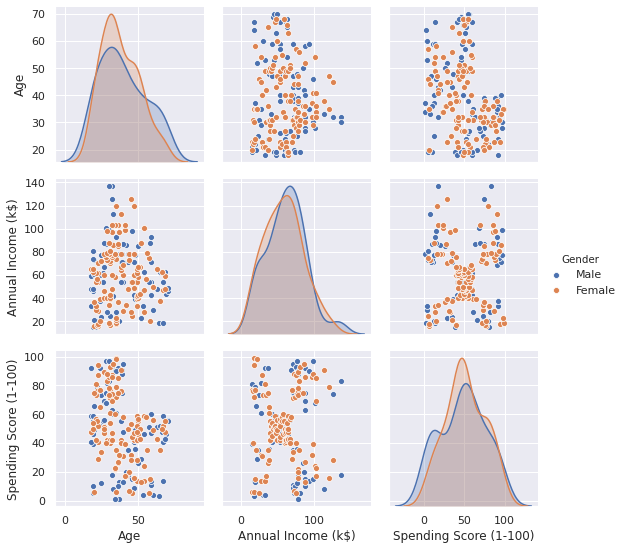

In [18]:
sns.pairplot(data.drop('CustomerID', axis=1), hue = "Gender")

***Correlation matrix***

In [19]:
data.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


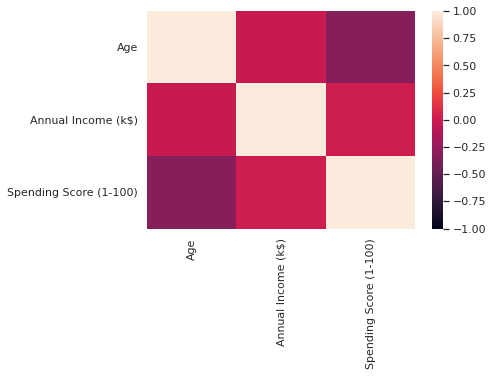

In [0]:
sns.heatmap(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr(), vmin=-1, vmax=1)

# **Preprocessing**

***Binarization of the gender feature***

In [0]:
data.Gender.replace(['Male', 'Female'], [1, 0], inplace=True)

***Standardization***

In [48]:
X = data.drop('CustomerID', axis=1)
"""
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)

X = scaler.transform(X)
"""

'\nfrom sklearn.preprocessing import StandardScaler\nscaler = StandardScaler()\nscaler.fit(X)\n\nX = scaler.transform(X)\n'

# **K-Means**

In [0]:
from sklearn.cluster import KMeans
import numpy as np

inertia = []


for i in range(1, 11):
  model = KMeans(n_clusters=i, random_state=0)
  model.fit(X)
  inertia.append(model.inertia_)


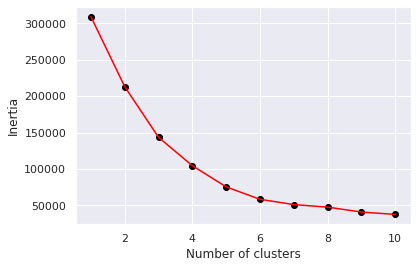

In [61]:
plt.plot([i for i in range(1,11)], inertia, 'o', color = 'black')
plt.plot([i for i in range(1,11)], inertia, '-', color = 'red')

plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()